# NOTEBOOK 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [3]:
# ============================================================
# NOTEBOOK 1: EDA + DATA CLEANING
# Dataset: WA_Fn-UseC_-Telco-Customer-Churn.csv
# ============================================================



# Make plots look nice
plt.style.use("ggplot")
sns.set(font_scale=1.1)


# LOAD DATASET
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Basic info
print("Shape:", df.shape)
df.info()


Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

CLEANING & DATA PREPARATION

In [6]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ", np.nan))

# Check missing values after conversion
df.isna().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
# Remove missing values created from invalid TotalCharges
df = df.dropna()

print("New shape after cleaning:", df.shape)


New shape after cleaning: (7032, 21)


CHECK DUPLICATES

In [8]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicates: 0


BASIC DESCRIPTIVE STATISTICS

In [9]:
# BASIC DESCRIPTIVE STATISTICS
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


CLASS DISTRIBUTION

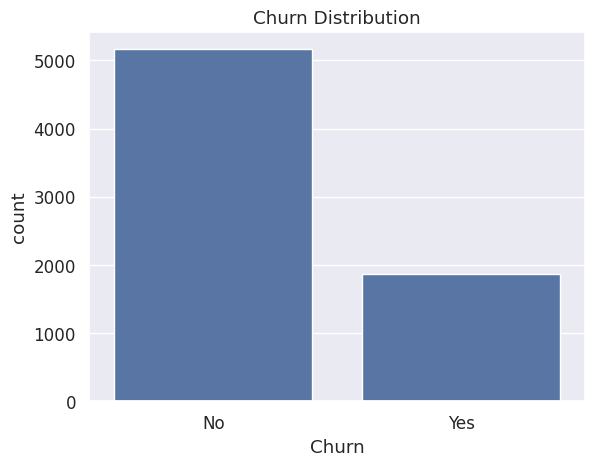

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [10]:
# CLASS DISTRIBUTION
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(churn_rate)


EDA — CATEGORY VS CHURN

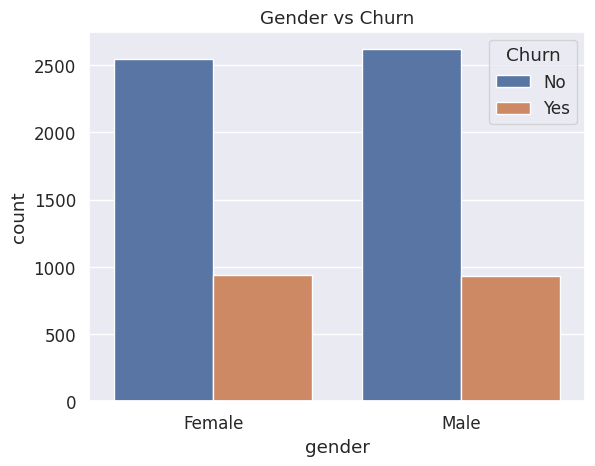

In [11]:
# Gender vs Churn
sns.countplot(data=df, x="gender", hue="Churn")
plt.title("Gender vs Churn")
plt.show()


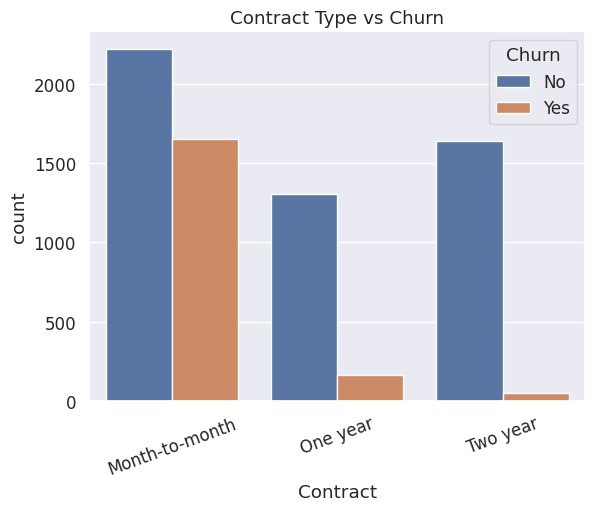

In [12]:
# Contract Type vs Churn
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.xticks(rotation=20)
plt.show()


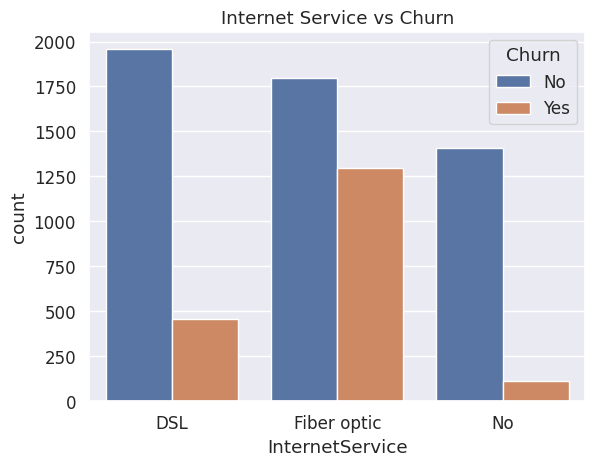

In [13]:
# Internet Service vs Churn
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Internet Service vs Churn")
plt.show()


NUMERICAL ANALYSIS

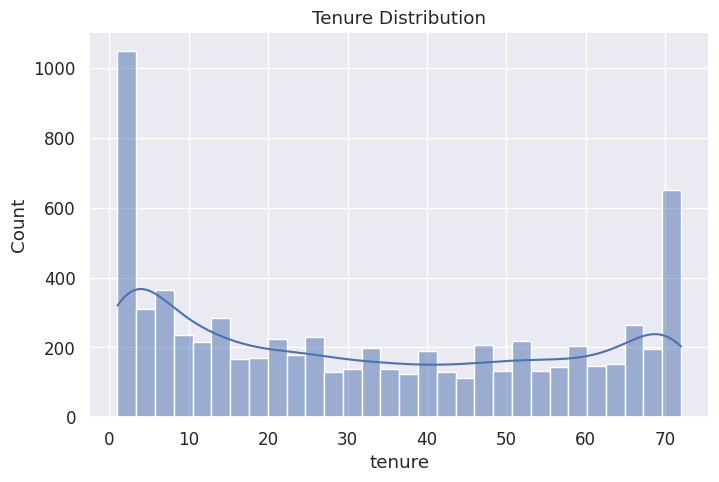

In [14]:
# Histogram: Tenure
plt.figure(figsize=(8,5))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()


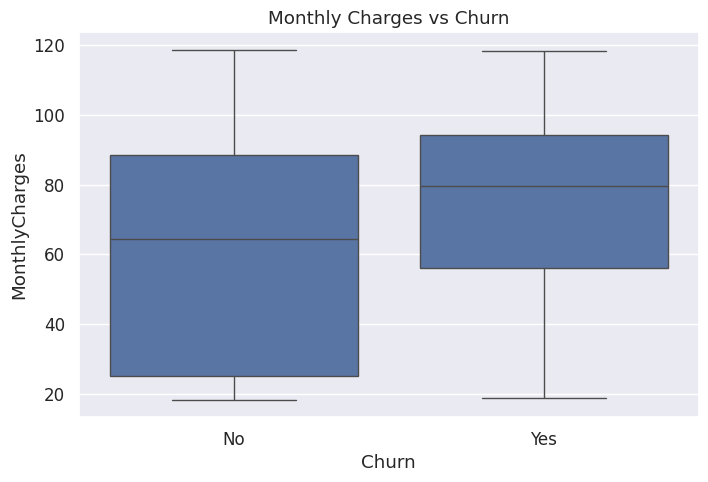

In [15]:
# Monthly Charges vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show()


##### CORRELATION HEATMAP

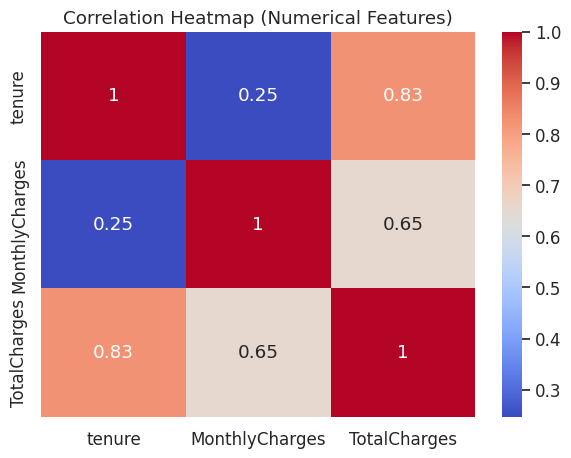

In [16]:
# Only numerical features
num_df = df[["tenure", "MonthlyCharges", "TotalCharges"]]

plt.figure(figsize=(7,5))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


# NOTEBOOK 2 — DECISION TREE + ANN

In [17]:
# ============================================================
# NOTEBOOK 2: Decision Tree + Keras ANN
# ============================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Keras Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


Load Dataset

In [18]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ", np.nan))
df = df.dropna()
df = df.drop_duplicates()

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Prepare Inputs

In [19]:
X = df.drop("Churn", axis=1)
y = df["Churn"].map({"No": 0, "Yes": 1})   # Binary encoding


Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Preprocessing Pipelines

In [21]:
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

preprocess_tree = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ("num", "passthrough", numerical_features)
])

preprocess_ann = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ("num", StandardScaler(), numerical_features)
])


MODEL 1 – DECISION TREE

In [22]:
dt_model = Pipeline([
    ("prep", preprocess_tree),
    ("clf", DecisionTreeClassifier(max_depth=6, criterion="gini"))
])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7896233120113717
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.61      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.79      0.79      1407



ROC-AUC for Decision Tree

In [23]:
from sklearn.metrics import roc_curve, auc

y_prob_dt = dt_model.predict_proba(X_test)[:,1]
auc_dt = roc_auc_score(y_test, y_prob_dt)
print("Decision Tree AUC:", auc_dt)


Decision Tree AUC: 0.8276436421616081


MODEL 2 – KERAS ANN

In [25]:
# Transform data for ANN
X_train_ann = preprocess_ann.fit_transform(X_train)
X_test_ann = preprocess_ann.transform(X_test)

input_dim = X_train_ann.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_ann, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7050 - loss: 0.5636 - val_accuracy: 0.8053 - val_loss: 0.4088
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8038 - loss: 0.4239 - val_accuracy: 0.8036 - val_loss: 0.4034
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8166 - loss: 0.4039 - val_accuracy: 0.8116 - val_loss: 0.4039
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8360 - loss: 0.3745 - val_accuracy: 0.8071 - val_loss: 0.4032
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8787 - loss: 0.3152 - val_accuracy: 0.7911 - val_loss: 0.4275
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9375 - loss: 0.2063 - val_accuracy: 0.7538 - val_loss: 0.4990
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9873 - loss: 0.0870 - val_accuracy: 0.7502 - val_loss: 0.4780
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9957 - loss: 0.0349 - val_accuracy: 0

Plot ANN Training Curves

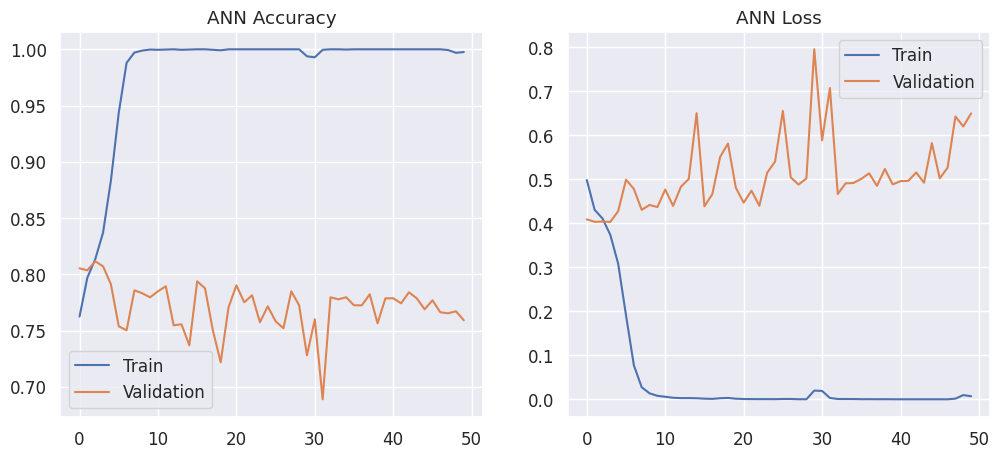

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("ANN Accuracy")
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("ANN Loss")
plt.legend(['Train', 'Validation'])

plt.show()


ANN Evaluation

In [27]:
y_pred_ann = (model.predict(X_test_ann) > 0.5).astype(int)

print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))

y_prob_ann = model.predict(X_test_ann)
print("ANN AUC:", roc_auc_score(y_test, y_prob_ann))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
ANN Accuracy: 0.7505330490405118
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.52      0.70      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
ANN AUC: 0.8213901154935265


MODEL COMPARISON

In [28]:
print("DECISION TREE ACC:", accuracy_score(y_test, y_pred_dt))
print("ANN ACC:", accuracy_score(y_test, y_pred_ann))
print("DECISION TREE AUC:", auc_dt)
print("ANN AUC:", roc_auc_score(y_test, y_prob_ann))


DECISION TREE ACC: 0.7896233120113717
ANN ACC: 0.7505330490405118
DECISION TREE AUC: 0.8276436421616081
ANN AUC: 0.8213901154935265
